# Data Quality Check and ETL

## Setup

### Importing Modules

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator

### Importing Data

In [6]:
item_categories = pd.read_csv("../data/item_categories.csv")
shops = pd.read_csv("../data/shops.csv")
items = pd.read_csv("../data/items.csv")

sales_train = pd.read_csv("../data/sales_train.csv")
test = pd.read_csv("../data/test.csv", index_col=0)

## Data Quality Check

In this section, we will provide some data analysis for each of the DataFrames we have and study them in the context of the following criteria:

1. NULL-values
2. Outliers (using __boxplots__)
3. Uniqueness
4. Data Format
5. Distributions

Also one important thing to notice, is that `item_categories`, `shops` and `items` are dataframes with supplemental information about the shops or the items. Also, all features in this DataFrames must be categorical, so for this 3 DataFrames we can just check

1. NULL-values
2. Uniqueness
3. Data Format

### Item Categories

#### General Observations

In [69]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


#### NULL-values

In [70]:
item_categories.isna().sum()

item_category_name    0
item_category_id      0
dtype: int64

As you can notice, there is no null-values in `item_categories` DataFrame 

#### Uniqueness

In [71]:
for feature in item_categories.columns:
	print(f" {feature} 's non-unique values : {item_categories.shape[0] - len(item_categories[feature].unique())}")

 item_category_name 's non-unique values : 0
 item_category_id 's non-unique values : 0


As you can notice, all values `item_categories` are unique

#### Data Format

In [72]:
item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


We can notice, that _`item_category_id`_ feature has __int64__ data type, and we need to fix it

In [73]:
item_categories_formatted = item_categories.copy()
item_categories_formatted["item_category_id"] = item_categories_formatted["item_category_id"].astype("object")
item_categories_formatted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


### Items

#### General Observations

In [74]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


#### NULL-values

In [75]:
items.isna().sum()

item_name           0
item_id             0
item_category_id    0
dtype: int64

As you can notice, there is no null-values in `items` DataFrame 

#### Uniqueness

In [76]:
for feature in items.columns:
	print(f" {feature} 's non-unique values : {items.shape[0] - len(items[feature].unique())}")

 item_name 's non-unique values : 0
 item_id 's non-unique values : 0
 item_category_id 's non-unique values : 22086


As you can notice, all features in `items` are unique except of _`item_category_id`_, which can have repeated values, so it is nothing to fix here

#### Data Format

In [77]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


We can notice, that _`item_category_id`_ and `item_id` features have __int64__ data type, and we need to fix it

In [78]:
items_formatted = items.copy()
items_formatted["item_category_id"] = items_formatted["item_category_id"].astype("object")
items_formatted["item_id"] = items_formatted["item_id"].astype("object")
items_formatted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  object
 2   item_category_id  22170 non-null  object
dtypes: object(3)
memory usage: 519.7+ KB


### Shops

#### General Observations

In [79]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


#### NULL-values

In [80]:
shops.isna().sum()

shop_name    0
shop_id      0
dtype: int64

As you can notice, there is no null-values in `shops` DataFrame 

#### Uniqueness

In [81]:
for feature in shops.columns:
	print(f" {feature} 's non-unique values : {shops.shape[0] - len(shops[feature].unique())}")

 shop_name 's non-unique values : 0
 shop_id 's non-unique values : 0


As you can notice, all values in `shops` are unique

#### Data Format

In [82]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


We can notice, that _`shop_id`_ feature has __int64__ data type, and we need to fix it

In [83]:
shops_formatted = shops.copy()
shops_formatted["shop_id"] = shops_formatted["shop_id"].astype("object")
shops_formatted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


### Sales

#### General Observation

In [84]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


#### NULL-values

In [85]:
sales_train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

As you can see, there is no missing values. But we also need to pay attention to values for different features, because we could have values, which are not missed but incorrect or unusual

In [86]:
sales_train.describe().loc[["min", "max"], :]

,date_block_num,shop_id,item_id,item_price,item_cnt_day
min,0.0,0.0,0.0,-1.0,-22.0
max,33.0,59.0,22169.0,307980.0,2169.0


Now we can notice that some objects have negative values for features, which cant be negative (price and amount of sold items cant be negative for sure). So lets inspect this objects

In [87]:
sales_train[sales_train["item_price"] <= 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


There is only one record with negative price, so we can easely inspect it

In [88]:
items[items["item_id"] == 2973]

,item_name,item_id,item_category_id
2973,"DmC Devil May Cry [PS3, русские субтитры]",2973,19


As you can see, it is a disc with a game Devil May Cry, and it cant have a negative price, so I think that it will be better to just drop this object from train set.

Next, lets inspect objects with negative _`item_cnt_day`_ feature

In [89]:
sales_train[sales_train["item_cnt_day"] <= 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0
2934462,18.10.2015,33,25,4896,6398.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0


Now, we can notice, that there is a lot of objects with negative values for _`item_cnt_day`_ feature, so it could be usefull information. Lets look deeper on this data

In [90]:
sales_train[sales_train["item_cnt_day"] <= 0]["item_cnt_day"].value_counts()

item_cnt_day
-1.0     7252
-2.0       78
-3.0       14
-5.0        4
-4.0        3
-6.0        2
-22.0       1
-16.0       1
-9.0        1
Name: count, dtype: int64

There are few different negative values for this feature, so it does not look like an error. We can interpret these values as product returns, and since these values directly affect how many items were sold, which is our target, these object can be useful in building the model.

So after examine null values, we can left all data ecxept of record with negative price

In [91]:
sales_train_nna = sales_train[sales_train["item_price"] > 0]
sales_train_nna

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


Also lets check _`date`_ and try to answer to the question "Is there any missing values?"

In [92]:
sales_train_nna.loc[:, "date"] = pd.to_datetime(sales_train_nna["date"], format="%d.%m.%Y")


full_time_range = pd.date_range(start=sales_train_nna["date"].min(), end=sales_train_nna["date"].max())
missing_dates = full_time_range.difference(sales_train_nna["date"].unique())
missing_dates

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

As you can see, there is no missing dates in train set, and data covers all timeline.

#### Uniqueness

In [93]:
temp = sales_train.groupby(["date", "shop_id", "item_id"]).count().reset_index()
print(temp[temp["item_price"] > 1].shape)
temp[temp["item_price"] > 1]

(28, 6)


,date,shop_id,item_id,date_block_num,item_price,item_cnt_day
39417,01.05.2014,50,3423,2,2,2
124538,02.03.2013,16,12133,2,2,2
396536,05.01.2013,54,20130,2,2,2
521664,06.04.2013,54,14050,2,2,2
610247,07.03.2013,50,12133,2,2,2
671583,07.10.2015,12,21619,2,2,2
815533,09.03.2014,31,12133,2,2,2
1076022,12.02.2015,42,21619,2,2,2
1112890,12.07.2014,25,3423,2,2,2
1301828,14.08.2014,31,9842,2,2,2


In [94]:
non_unique = temp[temp["item_price"] > 1].loc[:, ["date", "shop_id", "item_id"]]
sales_train_copy = sales_train.copy()
sales_train_copy["index"] = sales_train_copy.index
sales_train_copy.merge(non_unique, on=["date", "shop_id", "item_id"])["index"]
#sales_train_copy.drop(sales_train_copy.merge(non_unique, on=["date", "shop_id", "item_id"])["index"].values, axis="rows")

0        6959
1        6960
2       70686
3       70718
4       76961
5       76962
6      103461
7      103463
8      142696
9      142697
10     210156
11     210173
12     275474
13     275476
14     284371
15     284372
16     408103
17     408104
18    1154619
19    1154620
20    1203857
21    1203858
22    1435365
23    1435367
24    1496765
25    1496766
26    1507628
27    1507629
28    1524577
29    1524593
30    1671872
31    1671873
32    1866322
33    1866340
34    1890002
35    1890003
36    1940056
37    1940058
38    2110311
39    2110313
40    2198564
41    2198566
42    2213869
43    2213870
44    2231653
45    2231657
46    2272100
47    2272101
48    2420538
49    2420539
50    2456813
51    2456815
52    2475957
53    2475963
54    2909372
55    2909373
Name: index, dtype: int64

As you can see, there are only 28 tuples date-item-store which are not unique. And its is kinda strange. In our dataset we have 3000000 records, so this records are anomalies or errors. As we can see, some of the objects are completly same, some differs by price or count. Asuming, that our dataset is not a transaction dataset but daily sales summary, this records could be treated as errors.

#### Outliers and Distribution

Text(0.5, 1.0, 'Box Plot for item_price')

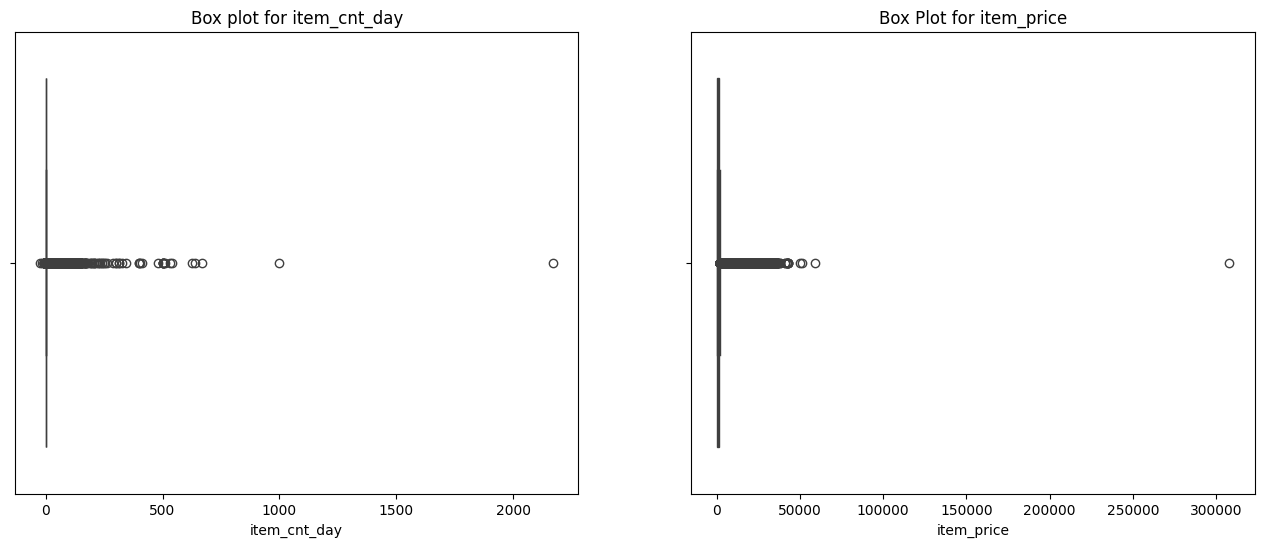

In [95]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(sales_train_nna, x="item_cnt_day")
plt.title("Box plot for item_cnt_day")

plt.subplot(1, 2, 2)
sns.boxplot(sales_train_nna, x="item_price")
plt.title("Box Plot for item_price")

As you can see there is a lot of outliers here. Lets compute lower and upper bounds for outliers 

In [96]:
item_price_IQR = sales_train_nna["item_price"].quantile(0.75) - sales_train_nna["item_price"].quantile(0.25)
item_price_lower_bound = sales_train_nna["item_price"].quantile(0.25) - 1.5 * item_price_IQR 
item_price_upper_bound = sales_train_nna["item_price"].quantile(0.75) + 1.5 * item_price_IQR 

item_cnt_day_IQR = sales_train_nna["item_cnt_day"].quantile(0.75) - sales_train_nna["item_cnt_day"].quantile(0.25)
item_cnt_day_lower_bound = sales_train_nna["item_cnt_day"].quantile(0.25) - 1.5 * item_cnt_day_IQR
item_cnt_day_upper_bound = sales_train_nna["item_cnt_day"].quantile(0.75) + 1.5 * item_cnt_day_IQR


print(f"Bounds for item_price: {item_price_lower_bound} --- {item_price_upper_bound}")
print(f"Bounds for item_cnt_day: {item_cnt_day_lower_bound} --- {item_cnt_day_upper_bound}")


Bounds for item_price: -876.0 --- 2124.0
Bounds for item_cnt_day: 1.0 --- 1.0


After computing lower and upper bounds, lets check an amount of objects, which are outliers

In [97]:
ip_outliers = sales_train_nna[(sales_train_nna["item_price"] < item_price_lower_bound ) | (sales_train_nna["item_price"] > item_price_upper_bound)].shape[0]
icd_outliers = sales_train_nna[(sales_train_nna["item_cnt_day"] < item_cnt_day_lower_bound ) | (sales_train_nna["item_cnt_day"] > item_cnt_day_upper_bound)].shape[0]

print("Item Price Outliers: ", ip_outliers)
print("Item CNT Day Outliers", icd_outliers)

Item Price Outliers:  258942
Item CNT Day Outliers 306477


You can notice, that is is about 10% of our data. Lets trim our data a bit in order to delete extremal outliers, and then take a look on result

Item Price Outliers:  229445
Item CNT Day Outliers 303353


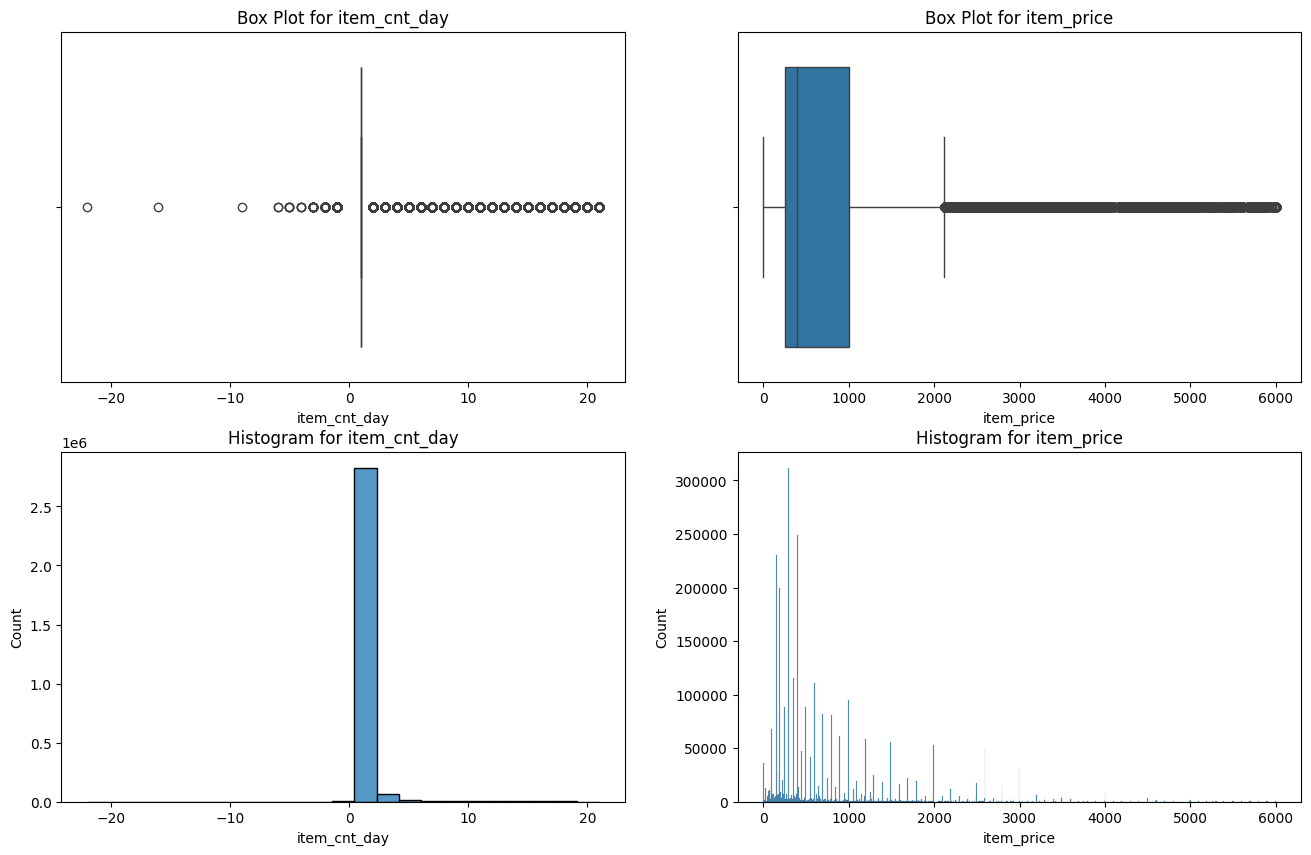

In [98]:
sales_train_tf = sales_train_nna.copy()

sales_train_tf_cnt = sales_train_tf[(sales_train_tf["item_cnt_day"] < sales_train_tf["item_cnt_day"].quantile(0.999))]
sales_train_tf_price = sales_train_tf[(sales_train_tf["item_price"] < sales_train_tf["item_price"].quantile(0.99))]

#sales_train_tf_price["item_price"] = sales_train_tf_price["item_price"].apply(lambda x : np.log(x))

plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.boxplot(sales_train_tf_cnt, x="item_cnt_day")
plt.title("Box Plot for item_cnt_day")

plt.subplot(2, 2, 2)
sns.boxplot(sales_train_tf_price, x="item_price")
plt.title("Box Plot for item_price")

plt.subplot(2, 2, 3)
sns.histplot(sales_train_tf_cnt, x="item_cnt_day")
plt.title("Histogram for item_cnt_day")

plt.subplot(2, 2, 4)
sns.histplot(sales_train_tf_price, x="item_price")
plt.title("Histogram for item_price")


item_price_IQR = sales_train_tf_price["item_price"].quantile(0.75) - sales_train_tf_price["item_price"].quantile(0.25)
item_price_lower_bound = sales_train_tf_price["item_price"].quantile(0.25) - 1.5 * item_price_IQR 
item_price_upper_bound = sales_train_tf_price["item_price"].quantile(0.75) + 1.5 * item_price_IQR 

item_cnt_day_IQR = sales_train_tf_cnt["item_cnt_day"].quantile(0.75) - sales_train_tf_cnt["item_cnt_day"].quantile(0.25)
item_cnt_day_lower_bound = sales_train_tf_cnt["item_cnt_day"].quantile(0.25) - 1.5 * item_cnt_day_IQR
item_cnt_day_upper_bound = sales_train_tf_cnt["item_cnt_day"].quantile(0.75) + 1.5 * item_cnt_day_IQR

ip_outliers = sales_train_tf_price[(sales_train_tf_price["item_price"] < item_price_lower_bound ) | (sales_train_tf_price["item_price"] > item_price_upper_bound)].shape[0]
icd_outliers = sales_train_tf_cnt[(sales_train_tf_cnt["item_cnt_day"] < item_cnt_day_lower_bound ) | (sales_train_tf_cnt["item_cnt_day"] > item_cnt_day_upper_bound)].shape[0]

print("Item Price Outliers: ", ip_outliers)
print("Item CNT Day Outliers", icd_outliers)

There is an important things which we can notice:

1. `item_price` distribution is left-skewed and mutlimodal, so we can try to apply `log` transformation or also use clustering algorithm in order to create features which could be usefull
2. `item_cnt_day` has a single peek with the values of 1 and this peek is dominant. That is the reason, why box plot treat all values except of __1__ as outliers, because about 85% of object have __1__ value for `item_cnt_day` feature.


Lets take a look on extremal outliers and check if it errors

In [99]:
temp = sales_train_nna.sort_values(by="item_price", ascending=False)[:50].join(items, on="item_id",lsuffix="l").join(item_categories, on="item_category_id", lsuffix="l")
temp

,date,date_block_num,shop_id,item_idl,item_price,item_cnt_day,item_name,item_id,item_category_idl,item_category_name,item_category_id
1163158,2013-12-13 00:00:00,11,12,6066,307980.0,1.0,Radmin 3 - 522 лиц.,6066,75,Программы - Для дома и офиса,75
885138,2013-09-17 00:00:00,8,12,11365,59200.0,1.0,Доставка (EMS),11365,9,Доставка товара,9
1488135,2014-03-20 00:00:00,14,25,13199,50999.0,1.0,Коллекционные шахматы (Властелин Колец),13199,69,Подарки - Сувениры,69
2327159,2015-01-29 00:00:00,24,12,7241,49782.0,1.0,UserGate Proxy & Firewall 6.X с модулем фильтр...,7241,75,Программы - Для дома и офиса,75
2931380,2015-10-20 00:00:00,33,22,13403,42990.0,1.0,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",13403,16,Игровые консоли - XBOX ONE,16
2885692,2015-10-23 00:00:00,33,42,13403,42990.0,1.0,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",13403,16,Игровые консоли - XBOX ONE,16
2910156,2015-10-29 00:00:00,33,12,13403,42990.0,1.0,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",13403,16,Игровые консоли - XBOX ONE,16
2917760,2015-10-20 00:00:00,33,3,13403,42990.0,1.0,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",13403,16,Игровые консоли - XBOX ONE,16
1006638,2013-10-24 00:00:00,9,12,7238,42000.0,1.0,UserGate Proxy & Firewall 6.X до 100 сессий,7238,75,Программы - Для дома и офиса,75
2893100,2015-10-20 00:00:00,33,38,13403,41990.0,1.0,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",13403,16,Игровые консоли - XBOX ONE,16


After analysing most extreme outliers, I can say, that they are probably not errors. They are just rare, but possible purchases of consoles, soft, colectional items or deliveries.

In [100]:
sales_train_nna.sort_values(by="item_cnt_day", ascending=False)[:50].join(items, on="item_id",lsuffix="o").join(item_categories, on="item_category_id", lsuffix="s")

,date,date_block_num,shop_id,item_ido,item_price,item_cnt_day,item_name,item_id,item_category_ids,item_category_name,item_category_id
2909818,2015-10-28 00:00:00,33,12,11373,0.908714,2169.0,Доставка до пункта выдачи (Boxberry),11373,9,Доставка товара,9
2326930,2015-01-15 00:00:00,24,12,20949,4.000000,1000.0,Фирменный пакет майка 1С Интерес белый (34*42)...,20949,71,"Подарки - Сумки, Альбомы, Коврики д/мыши",71
2864235,2015-09-30 00:00:00,32,12,9248,1692.526158,669.0,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) [...",9248,80,Служебные - Билеты,80
2851091,2015-09-30 00:00:00,32,55,9249,1702.825746,637.0,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) У...",9249,8,Билеты (Цифра),8
2608040,2015-04-14 00:00:00,27,12,3731,1904.548077,624.0,"Grand Theft Auto V [PC, русские субтитры]",3731,30,Игры PC - Стандартные издания,30
2626181,2015-05-19 00:00:00,28,12,11373,155.192950,539.0,Доставка до пункта выдачи (Boxberry),11373,9,Доставка товара,9
2851073,2015-09-29 00:00:00,32,55,9249,1500.000000,533.0,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) У...",9249,8,Билеты (Цифра),8
2048518,2014-10-02 00:00:00,21,12,9242,1500.000000,512.0,"Билет ""ИгроМир 2014"" (на один день (отдельно -...",9242,8,Билеты (Цифра),8
2067669,2014-10-09 00:00:00,21,55,19437,899.000000,508.0,"Средиземье: Тени Мордора [PC, Цифровая версия]",19437,31,Игры PC - Цифра,31
2864260,2015-09-29 00:00:00,32,12,9248,1500.000000,504.0,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) [...",9248,80,Служебные - Билеты,80


For this objects I think that first 2 record could be outliers, in comparisson to other purchases of this items there is no other objects with ammount of items sold per day close to this 2 records. So we can delete them.

### Test

#### General Observations

In [101]:
test.head()

,shop_id,item_id
ID,,
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268


In [102]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214200 entries, 0 to 214199
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   shop_id  214200 non-null  int64
 1   item_id  214200 non-null  int64
dtypes: int64(2)
memory usage: 4.9 MB


In test dataset we have only shop_id and _`item_id`_ and _`shop_id`_ features. In this task, we have to predict sales for every item in every shop for the next month, so that is all information we have.

#### Null-values

In [103]:
test.isna().sum()

shop_id    0
item_id    0
dtype: int64

There is no null values in this DataFrame, as expected.

#### Intersections

It is important to check intersections between train and test datasets in order to escape situations, when we have information in train which is useless for current test set etc.

In [104]:
train_pairs = sales_train.groupby(["shop_id", "item_id"]).count().reset_index().loc[:, ["shop_id", "item_id"]]
train_pairs

,shop_id,item_id
0,0,30
1,0,31
2,0,32
3,0,33
4,0,35
...,...,...
424119,59,22154
424120,59,22155
424121,59,22162
424122,59,22164


In [105]:
test_pairs = test.groupby(["shop_id", "item_id"]).count().reset_index().loc[:, ["shop_id", "item_id"]]
test_pairs

,shop_id,item_id
0,2,30
1,2,31
2,2,32
3,2,33
4,2,38
...,...,...
214195,59,22162
214196,59,22163
214197,59,22164
214198,59,22166


>Offtop, we can conclude that in test set all values are unique, because after grouping, the size of the test is still the same, but lets come back to intersection test

As you can notice, shop-item pairs from train are different from that pairs from test. Now, we need to check, what pairs from test we dont have in train and what pairs from train we dont have in test

First lets check intersections between this two sets.

In [106]:
train_pairs.merge(test_pairs, on=["shop_id", "item_id"])

,shop_id,item_id
0,2,30
1,2,31
2,2,32
3,2,33
4,2,53
...,...,...
111399,59,22145
111400,59,22154
111401,59,22162
111402,59,22164


This dataframe shows us, that there are only 111404 pairs shop-item, which are common for both train and test sets. That means, that:
1. We have a lot of data in train set, which is useless for this task, because it gives us no information for predictions 
2. We also have a lot of data in test set, for which we have no information, which we could use in order to predict this values, so we will set them manually.

So, lets find this data...

In [107]:
train_only = train_pairs.merge(test_pairs, how="left", on=["shop_id", "item_id"], indicator=True)
train_only = train_only[train_only["_merge"] == "left_only"].drop("_merge", axis="columns")
train_only

,shop_id,item_id
0,0,30
1,0,31
2,0,32
3,0,33
4,0,35
...,...,...
424114,59,22144
424116,59,22150
424117,59,22151
424118,59,22153


In [108]:
test_only = test_pairs.merge(train_pairs, how="left", on=["shop_id", "item_id"], indicator=True)
test_only = test_only[test_only["_merge"] == "left_only"].drop("_merge", axis="columns")
test_only

,shop_id,item_id
4,2,38
5,2,42
6,2,45
7,2,51
9,2,57
...,...,...
214184,59,22101
214189,59,22111
214191,59,22137
214196,59,22163


So now, when we have calculated both sets, we can:
1. Delete from train set that values, that we have only in train set
2. Save shop-id pairs, that we have only in test set, so we could use them to manually set predictions to 0

In [109]:
test_only.to_csv("../utils/test_only_data.csv")

### Data Format

In this section, we will check, if data types and formates are correct

First thing to decide is what will be data types for different columns

In [110]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


The only things that we need to change here is to assign:
1. `datetime` dtype for _`date`_
2. `object` dtype forr _`shop_id`_ and _`item_price`_

In [111]:
sales_train_tf = sales_train_nna.copy()

sales_train_tf["date"] = pd.to_datetime(sales_train_tf["date"], format="%d.%m.%Y")
sales_train_tf["item_id"] = sales_train_tf["item_id"].astype("O")
sales_train_tf["shop_id"] = sales_train_tf["shop_id"].astype("O")

print(sales_train_tf.info())
sales_train_tf

<class 'pandas.core.frame.DataFrame'>
Index: 2935848 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         object        
 3   item_id         object        
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 156.8+ MB
None


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [112]:
sales_train_tf.sort_values(by="date")

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
52885,2013-01-01,0,8,16176,399.0,1.0
82393,2013-01-01,0,54,3320,1999.0,1.0
82409,2013-01-01,0,54,3470,349.0,1.0
82413,2013-01-01,0,54,3429,2799.0,-1.0
108947,2013-01-01,0,46,16870,379.0,1.0
...,...,...,...,...,...,...
2885098,2015-10-31,33,41,21386,169.0,1.0
2930981,2015-10-31,33,21,988,199.0,1.0
2885097,2015-10-31,33,41,21377,169.0,1.0
2930993,2015-10-31,33,22,10207,1199.0,1.0


As you can see, there is no errors after transformation, so we can assume, that data formats are correct

Also, one thing that we can check is compatibility of tables. Main information for training is stored in `sales_train` dataset, but also we can use datasets with supplemental information like `items`, `shops` and `item_categories`. Lets merge this datasets using __.join__ and check compitability of resulted dataframe

In [113]:
item_categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [114]:
resulted = sales_train.join(shops, on="shop_id", lsuffix="_l").join(items, on="item_id", lsuffix="l").join(item_categories, on="item_category_id", lsuffix="l")

In [115]:
resulted.head()

,date,date_block_num,shop_id_l,item_idl,item_price,item_cnt_day,shop_name,shop_id,item_name,item_id,item_category_idl,item_category_name,item_category_id
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",59,ЯВЛЕНИЕ 2012 (BD),22154,37,Кино - Blu-Ray,37
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",25,DEEP PURPLE The House Of Blue Light LP,2552,58,Музыка - Винил,58
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",25,DEEP PURPLE The House Of Blue Light LP,2552,58,Музыка - Винил,58
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",25,DEEP PURPLE Who Do You Think We Are LP,2554,58,Музыка - Винил,58
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",25,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),2555,56,Музыка - CD фирменного производства,56


In [116]:
resulted.isna().sum()

date                  0
date_block_num        0
shop_id_l             0
item_idl              0
item_price            0
item_cnt_day          0
shop_name             0
shop_id               0
item_name             0
item_id               0
item_category_idl     0
item_category_name    0
item_category_id      0
dtype: int64

As a result, we can see, that all data is consistent.

## ETL

In this section we will write a Pandas Pipeline for data transformation from raw data to dataframe which is ready to EDA stage.

The things to implement:

1. Delete unnecessary data from train
2. Merge dataframes
3. Delete objects with negative _`item_price`_
4. Delete selected outliers by _`item_cnt_day`_ feature
5. Assign correct datatypes

We will write some custom transformers and then merge them into pipeline

> It is important to notice, that in general, we dont have to delete data from train, but for test set that we have, there are a lot of unnecessary data. So I will construct to pipelines, one with train transformation and one without. And it the end, I will test them

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin

class TrainTransformer(BaseEstimator, TransformerMixin):
    
    def __init__ (self, test):
        self.test = test
        
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        train = X.copy()
        test_pairs = self.test.groupby(["shop_id", "item_id"]).count().reset_index().loc[:, ["shop_id", "item_id"]]
        
        transformed_train = train.merge(test_pairs, on=["shop_id", "item_id"])
        return transformed_train        
    
    
class UniquenessTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features = features
  
    def fit(self, X, y=None):
        return self
    
    def transform(self, X:pd.DataFrame, y=None):
        X_copy = X.copy()
        X_copy["index"] = X_copy.index
        
        X_group = X_copy.groupby(self.features).count().reset_index()
        count_feature = X_group.columns[len(self.features)]
        non_unique = X_group[X_group[count_feature] > 1]
        X_copy.drop(X_copy.merge(non_unique, on=self.features)["index_x"].values, axis="rows", inplace=True)
        return X_copy.drop(["index"], axis="columns")
    
    
    

class MergeTransformer(BaseEstimator, TransformerMixin):
    
    def __init__ (self, merge_list):
        self.merge_list = merge_list
            
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        
        mergeX = X.copy()
        
        for key, value in self.merge_list:
            mergeX = mergeX.join(key, on=value, lsuffix="_to_delete")
            
            
        to_delete = []   
        for column in mergeX.columns:
            if column.find("_to_delete") != -1:
                to_delete.append(column)
            
        
        return mergeX.drop(to_delete, axis=1)
    
    
class NegativeValueTransformer(BaseEstimator, TransformerMixin):
    
    def __init__ (self, feature):
        self.feature = feature
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[X[self.feature] > 0]
    

class OutliersTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[X["item_cnt_day"] < 1000]
    
    
    
class DtypesTransformer(BaseEstimator, TransformerMixin):
    
    def __init__ (self, feature_map):
        self.feature_map = feature_map
        
    
    def fit(self, X, y=None):
        return self
    
    
    def transform(self, X):
        for key, value in self.feature_map.items():
            if key == "date":
                X[key] = pd.to_datetime(X[key], format=value)
            else : X[key] = X[key].astype(value)
            
            
        return X            

In [118]:
shops = pd.read_csv("../data/shops.csv")
items = pd.read_csv("../data/items.csv")
item_categories = pd.read_csv("../data/item_categories.csv")

sales_train = pd.read_csv("../data/sales_train.csv")
test = pd.read_csv("../data/test.csv")

merge_list = [(shops, "shop_id"), (items, "item_id"), (item_categories ,"item_category_id")]
unique_features = ["date", "shop_id", "item_id"]

feature_map = {"date" : "%d.%m.%Y",
    		   "date_block_num" : "int",
               "shop_id" : "O",
               "item_id" : "O",
               "item_price" : "float",
               "item_cnt_day" : "float",
               "shop_name" : "O",
               "item_name" : "O",
               "item_category_name" : "O", 
               "item_category_id" : "O"}

etl_pipeline_v1 = Pipeline([
    ("uniqueness_check", UniquenessTransformer(unique_features)),
	("merge_dataframe", MergeTransformer(merge_list)),
	("negative_values", NegativeValueTransformer("item_price")),
	("selected_outliers", OutliersTransformer()),
	("dtypes", DtypesTransformer(feature_map))
])

etl_pipeline_v2 = Pipeline([
    ("uniqueness_check", UniquenessTransformer(unique_features)),
    ("train_cleaning", TrainTransformer(test)),
	("merge_dataframe", MergeTransformer(merge_list)),
	("negative_values", NegativeValueTransformer("item_price")),
	("selected_outliers", OutliersTransformer()),
	("dtypes", DtypesTransformer(feature_map))
])


result = etl_pipeline_v1.fit_transform(sales_train)
result

,date,date_block_num,item_price,item_cnt_day,shop_name,shop_id,item_name,item_id,item_category_name,item_category_id
0,2013-01-02,0,999.00,1.0,"Ярославль ТЦ ""Альтаир""",59,ЯВЛЕНИЕ 2012 (BD),22154,Кино - Blu-Ray,37
1,2013-01-03,0,899.00,1.0,"Москва ТРК ""Атриум""",25,DEEP PURPLE The House Of Blue Light LP,2552,Музыка - Винил,58
2,2013-01-05,0,899.00,-1.0,"Москва ТРК ""Атриум""",25,DEEP PURPLE The House Of Blue Light LP,2552,Музыка - Винил,58
3,2013-01-06,0,1709.05,1.0,"Москва ТРК ""Атриум""",25,DEEP PURPLE Who Do You Think We Are LP,2554,Музыка - Винил,58
4,2013-01-15,0,1099.00,1.0,"Москва ТРК ""Атриум""",25,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),2555,Музыка - CD фирменного производства,56
...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,299.00,1.0,"Москва ТРК ""Атриум""",25,V/A Nu Jazz Selection (digipack),7409,Музыка - CD локального производства,55
2935845,2015-10-09,33,299.00,1.0,"Москва ТРК ""Атриум""",25,V/A The Golden Jazz Collection 1 2CD,7460,Музыка - CD локального производства,55
2935846,2015-10-14,33,349.00,1.0,"Москва ТРК ""Атриум""",25,V/A The Best Of The 3 Tenors,7459,Музыка - CD локального производства,55
2935847,2015-10-22,33,299.00,1.0,"Москва ТРК ""Атриум""",25,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),7440,Музыка - MP3,57


In the end, we can pickle ETL pipelines in order to be able to use it for data transformation

In [119]:
from pickle import load, dump

dump(etl_pipeline_v1, open("../pipelines/etl_pipeline_v1.pkl", "wb"))
dump(etl_pipeline_v2, open("../pipelines/etl_pipeline_v2.pkl", "wb"))

Lets check if it works

In [8]:
etl_pipeline_loaded = load(open("../pipelines/etl_pipeline_v1.pkl", "rb"))

etl_pipeline_loaded.fit_transform(sales_train)

,date,date_block_num,item_price,item_cnt_day,shop_name,shop_id,item_name,item_id,item_category_name,item_category_id
0,2013-01-02,0,999.00,1.0,"Ярославль ТЦ ""Альтаир""",59,ЯВЛЕНИЕ 2012 (BD),22154,Кино - Blu-Ray,37
1,2013-01-03,0,899.00,1.0,"Москва ТРК ""Атриум""",25,DEEP PURPLE The House Of Blue Light LP,2552,Музыка - Винил,58
2,2013-01-05,0,899.00,-1.0,"Москва ТРК ""Атриум""",25,DEEP PURPLE The House Of Blue Light LP,2552,Музыка - Винил,58
3,2013-01-06,0,1709.05,1.0,"Москва ТРК ""Атриум""",25,DEEP PURPLE Who Do You Think We Are LP,2554,Музыка - Винил,58
4,2013-01-15,0,1099.00,1.0,"Москва ТРК ""Атриум""",25,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),2555,Музыка - CD фирменного производства,56
...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,299.00,1.0,"Москва ТРК ""Атриум""",25,V/A Nu Jazz Selection (digipack),7409,Музыка - CD локального производства,55
2935845,2015-10-09,33,299.00,1.0,"Москва ТРК ""Атриум""",25,V/A The Golden Jazz Collection 1 2CD,7460,Музыка - CD локального производства,55
2935846,2015-10-14,33,349.00,1.0,"Москва ТРК ""Атриум""",25,V/A The Best Of The 3 Tenors,7459,Музыка - CD локального производства,55
2935847,2015-10-22,33,299.00,1.0,"Москва ТРК ""Атриум""",25,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),7440,Музыка - MP3,57


In [9]:
from pickle import load, dump

etl_pipeline_loaded = load(open("../pipelines/etl_pipeline_v2.pkl", "rb"))

etl_pipeline_loaded.fit_transform(sales_train)

,date,date_block_num,item_price,item_cnt_day,shop_name,shop_id,item_name,item_id,item_category_name,item_category_id
0,2013-01-02,0,999.0,1.0,"Ярославль ТЦ ""Альтаир""",59,ЯВЛЕНИЕ 2012 (BD),22154,Кино - Blu-Ray,37
1,2013-01-03,0,399.0,2.0,"Москва ТРК ""Атриум""",25,DEL REY LANA Born To Die The Paradise Editio...,2574,Музыка - CD локального производства,55
2,2013-01-05,0,399.0,1.0,"Москва ТРК ""Атриум""",25,DEL REY LANA Born To Die The Paradise Editio...,2574,Музыка - CD локального производства,55
3,2013-01-07,0,399.0,1.0,"Москва ТРК ""Атриум""",25,DEL REY LANA Born To Die The Paradise Editio...,2574,Музыка - CD локального производства,55
4,2013-01-08,0,399.0,2.0,"Москва ТРК ""Атриум""",25,DEL REY LANA Born To Die The Paradise Editio...,2574,Музыка - CD локального производства,55
...,...,...,...,...,...,...,...,...,...,...
1224410,2015-10-10,33,299.0,1.0,"Москва ТРК ""Атриум""",25,V/A Nu Jazz Selection (digipack),7409,Музыка - CD локального производства,55
1224411,2015-10-09,33,299.0,1.0,"Москва ТРК ""Атриум""",25,V/A The Golden Jazz Collection 1 2CD,7460,Музыка - CD локального производства,55
1224412,2015-10-14,33,349.0,1.0,"Москва ТРК ""Атриум""",25,V/A The Best Of The 3 Tenors,7459,Музыка - CD локального производства,55
1224413,2015-10-22,33,299.0,1.0,"Москва ТРК ""Атриум""",25,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),7440,Музыка - MP3,57
